<a href="https://colab.research.google.com/github/NeevSabhani/Data-Science/blob/main/Unit4/NeevSabhUnit4Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


#**Unit 4 Project: Basketball Position vs Field Goal Percentage**

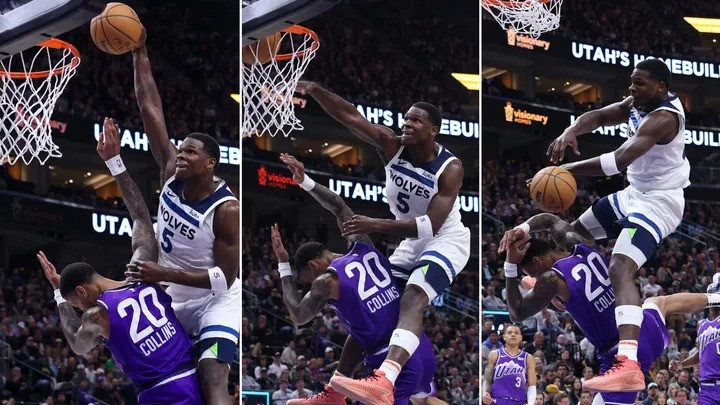

##**Part 1: Introduction**

Basketball is a game in which you must score more points than the opposing team. Many people think that it is as simple as shooting balls and you will slowly accumalate points. However, it is not that simple. Depending on the game script, you will have limited number of shots and if you want to maximize the amount of points your team scores off of those limited shots, you must be effecient and make as many shots in as possible. To track this, there is a stat called field goal percentage (FG%). Many people think about the football field goal when they hear this, but this field goal is different. A field goal is a any shot from the for which is intended to go into the rim. To calculate the field goal percentage, they just do amount made over amount attempted.

To the common person, this may not be this interesting, but to me, as an avid basketball enjoyer, I think this is interesting to see the connections between the Position Played vs the Field Goal Percentage.

##**Part 2: Data**

First thing that I will do is upload the csv and **remove all the players that are listed as dual position. This will just make the data easier to handle.**

In [2]:
csv= "/content/basketball2324.csv"

Player_data = pd.read_csv(csv)

# Filter out players with multiple positions
filtered_data = Player_data[Player_data['Pos'].apply(lambda x: len(x.split('-')) == 1)]

filtered_data


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
5,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


Now let me mulitply all values in the category by 100 so the data is easier to handle and let me isolation the Player Name, Position, and FG% categories so we have only useful categories.

In [3]:
filtered_data['FG%'] = filtered_data['FG%'] * 100

# Retain only the 'Player', 'Pos', and 'B/G' columns
final_data = filtered_data[['Player', 'Pos', 'FG%']]

final_data

<ipython-input-3-9d6ecc91e98b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['FG%'] = filtered_data['FG%'] * 100


,Player,Pos,FG%
1,Bam Adebayo,C,52.1
2,Ochai Agbaji,SG,41.1
3,Santi Aldama,PF,43.5
4,Nickeil Alexander-Walker,SG,43.9
5,Grayson Allen,SG,49.9
...,...,...,...
567,Thaddeus Young,PF,60.2
568,Trae Young,PG,43.0
569,Omer Yurtseven,C,53.8
570,Cody Zeller,C,41.9


(array([  8.,   3.,   7.,  12.,  50., 183., 182.,  65.,  35.,  10.]),
 array([ 0.  ,  7.47, 14.94, 22.41, 29.88, 37.35, 44.82, 52.29, 59.76,
        67.23, 74.7 ]),
 <BarContainer object of 10 artists>)

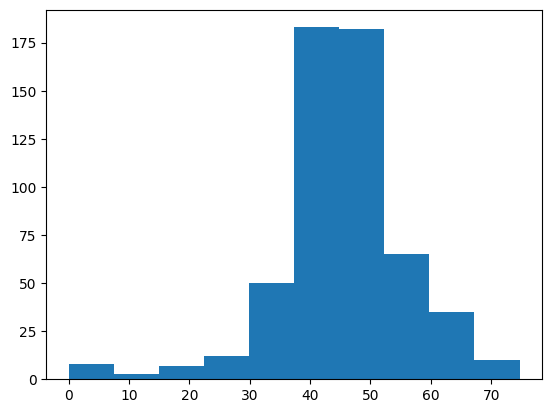

In [4]:
plt.hist(final_data['FG%'])

Above is a visualization of our data. This will be useful later on when we are creating models on our data.

In [5]:
# Encode the 'Pos' column
pos_encode = pd.Categorical(filtered_data['Pos'])
pos_index = pos_encode.codes
pos_coords = {"positions": pos_encode.categories}

# Print the encoded position categories and indices
print(pos_encode)
print(pos_index)
print(pos_coords)

['C', 'SG', 'PF', 'SG', 'SG', ..., 'PF', 'PG', 'C', 'C', 'C']
Length: 559
Categories (5, object): ['C', 'PF', 'PG', 'SF', 'SG']
[0 4 1 4 4 0 3 2 1 1 1 2 3 2 3 0 0 0 0 2 3 2 0 1 4 2 1 1 4 4 0 3 3 1 1 4 4
 3 4 1 2 3 0 4 0 2 3 3 4 1 0 2 3 1 4 2 2 4 3 3 3 2 2 2 3 4 1 3 4 1 0 3 2 0
 4 3 4 4 1 1 4 1 0 2 0 4 4 0 4 3 3 4 3 1 4 0 1 3 1 0 2 3 3 4 3 1 2 2 4 2 2
 0 4 4 4 3 0 1 4 4 1 2 4 2 3 4 2 3 0 3 4 2 1 0 1 4 3 4 0 0 3 2 0 1 4 2 3 2
 4 4 2 2 3 2 4 1 2 1 0 3 2 1 1 4 0 2 1 2 2 0 2 1 4 2 1 1 4 4 1 4 3 1 4 3 4
 1 1 1 2 2 2 3 2 4 1 4 4 4 1 4 3 0 3 4 0 2 3 2 1 4 1 4 4 2 2 4 0 4 0 2 3 3
 3 4 0 3 1 2 3 3 4 1 4 4 1 0 0 3 2 2 1 1 3 4 4 0 4 4 1 3 1 3 4 3 0 4 0 3 3
 4 2 2 0 2 1 4 4 0 3 3 0 3 3 4 0 2 1 1 0 1 4 4 2 0 3 4 2 3 1 2 3 0 1 3 1 0
 0 0 1 2 3 1 2 0 4 2 0 1 3 3 3 3 4 3 4 2 2 2 2 3 3 3 0 4 2 4 0 4 0 2 3 3 3
 3 3 2 4 3 3 2 4 1 1 4 4 4 4 4 2 1 1 2 3 4 2 3 3 0 3 0 1 2 3 1 2 1 4 4 2 0
 3 3 3 4 0 3 0 3 3 3 2 2 4 3 1 0 3 4 2 0 4 0 1 4 2 1 3 3 1 0 1 0 4 2 4 1 2
 1 4 0 4 4 1 0 4 3 0 0 4 0 4 3 4 0 0 1 1 2 2 4 

##**Part 3: Non-Hierarchical Model**

Now that we have organized our data into something that we like and we have created our categories, lets start off with a non-hierarchical model which assumes independence among our categories.

###**First Model**

Taking into the account the visualization of our data we did in the section above, I was thinking about using a likelihood like Normal to start off with.

In [ ]:

# Define the model
with pm.Model(coords=pos_coords) as BG1_nh_normal:

    # Regular priors
    mu = pm.Normal('mu', mu=50, sigma=5, dims="positions")  # Set the mean to 50% (50)
    σ = pm.HalfNormal('σ', sigma=30, dims="positions")       # Keep the scale prior for σ

    # Normal likelihood for the observed data (assuming FG% is normally distributed)
    y = pm.Normal('y', mu=mu[pos_index], sigma=σ[pos_index], observed=final_data["FG%"])

    # Sampling
    iBG1_nh_normal = pm.sample()


/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1278: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

Output()

Output()

<Axes: xlabel='y_observed'>

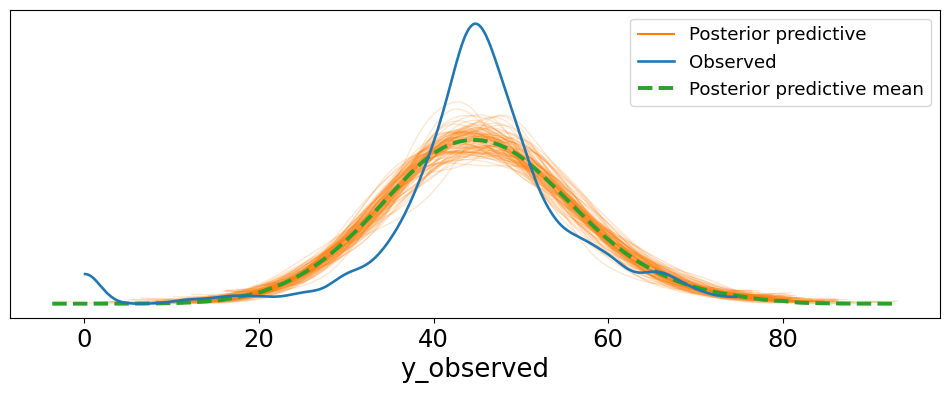

In [ ]:
pm.sample_posterior_predictive(iBG1_nh_normal, model=BG1_nh_normal, extend_inferencedata=True)

az.plot_ppc(iBG1_nh_normal, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"])

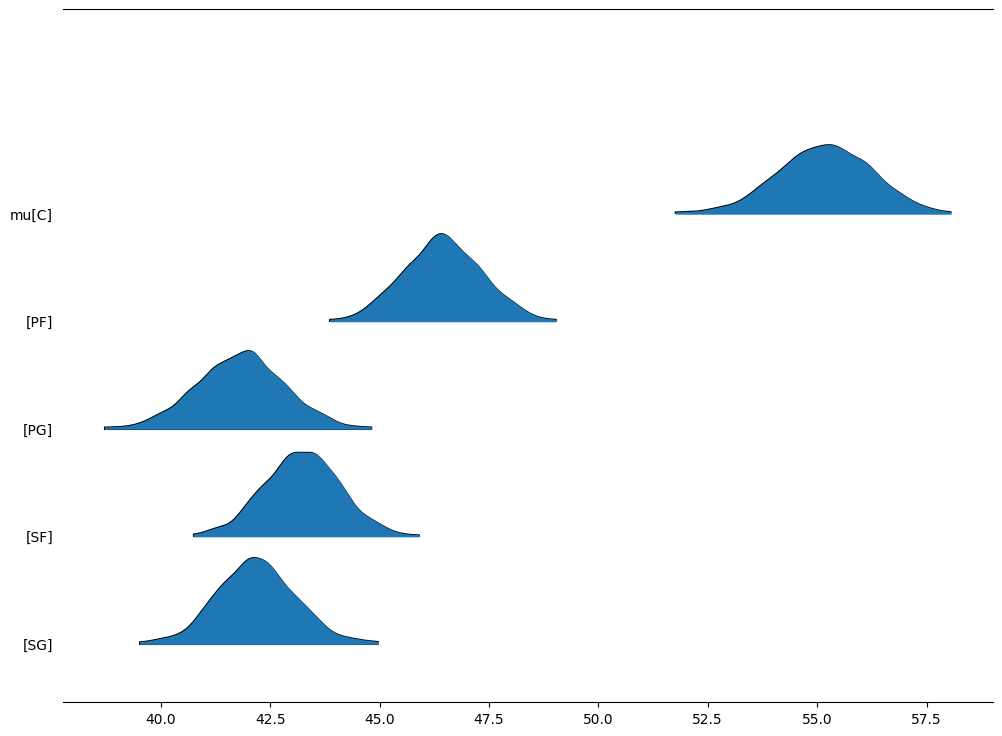

In [ ]:
axes = az.plot_forest(iBG1_nh_normal, kind="ridgeplot",
                      var_names='mu',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

As you can see in the posterior predictive check, the peak is quite not right. It is not as high as it should be. For this next model I think that I will use StudentT.

###**Second Model**

In [ ]:
with pm.Model(coords=pos_coords) as BG2_nh_studentt:

    # Regular priors with tighter priors for a more concentrated distribution
    mu = pm.Normal('mu', mu=50, sigma=2, dims="positions")  # Set the mean to 50% with a smaller sigma
    σ = pm.HalfNormal('σ', sigma=10, dims="positions")      # Tighten the scale prior for σ

    # Student's t likelihood for the observed data (assuming FG% follows a t-distribution)
    nu = pm.Exponential('nu', lam=1, dims="positions")  # Degrees of freedom prior (set a more concentrated prior)

    # Use Student's t-distribution for the likelihood
    y = pm.StudentT('y', mu=mu[pos_index], sigma=σ[pos_index], nu=nu[pos_index], observed=final_data["FG%"])

    # Sampling
    iBG2_nh_studentt = pm.sample()


/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1278: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

Output()

Output()

(0.0, 100.0)

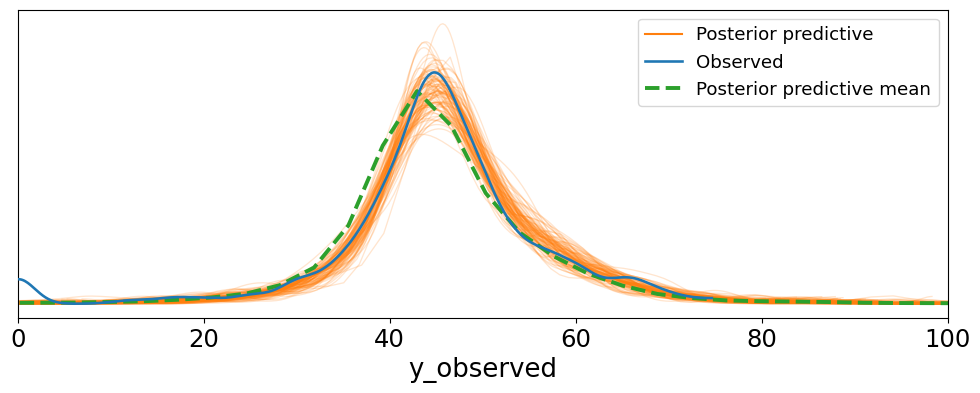

In [ ]:
pm.sample_posterior_predictive(iBG2_nh_studentt, model=BG2_nh_studentt, extend_inferencedata=True)

plot = az.plot_ppc(iBG2_nh_studentt, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"])
plot.set_xlim(0, 100)

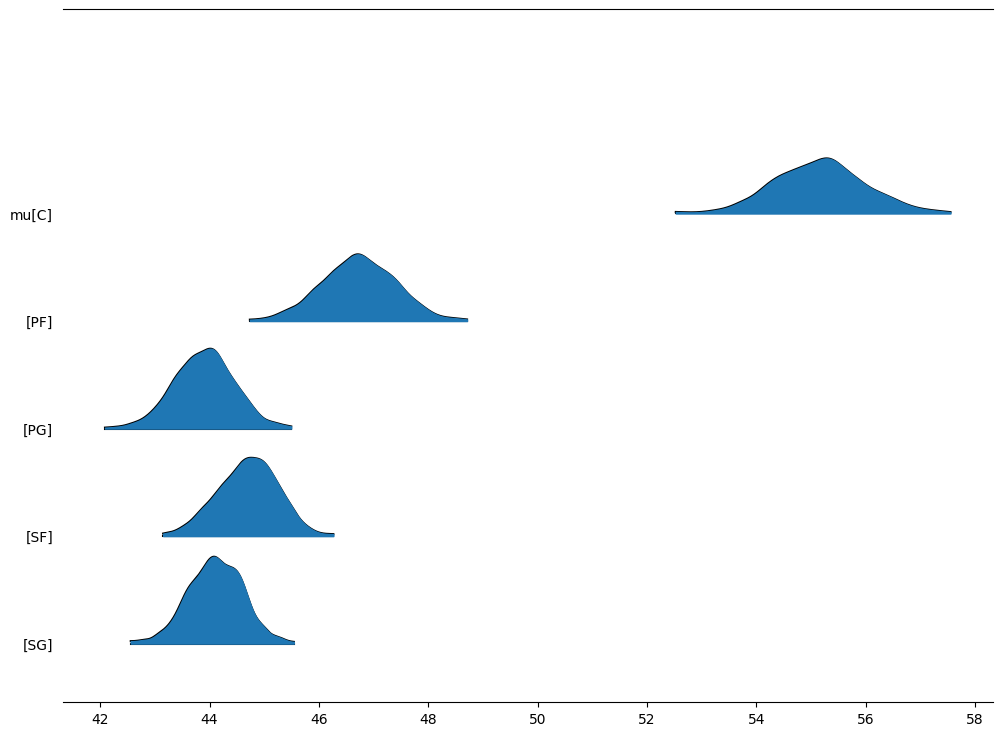

In [ ]:
axes = az.plot_forest(iBG2_nh_studentt, kind="ridgeplot",
                      var_names='mu',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

While this model does look a little better than the one before, this is only use StudentT which does account for skew. For the next model I will switch it to SkewStudentT and change some of my priors to try and get that higher peak.

###**Third Model**

In [ ]:
with pm.Model(coords=pos_coords) as BG2_nh_skewstudentt:

    # Regular priors: Set tighter priors to focus on a more concentrated distribution
    mu = pm.Normal('mu', mu=50, sigma=2, dims="positions")  # Set the mean to 50% (location parameter)
    sigma = pm.HalfNormal('sigma', sigma=2, dims="positions")  # Scale parameter (sigma > 0)

    # Shape parameters for skewness, ensuring that 'a' and 'b' are positive
    a = pm.HalfNormal('a', sigma=2, dims="positions")  # Shape parameter for skewness (a > 0)
    b = pm.HalfNormal('b', sigma=2, dims="positions")  # Shape parameter for skewness (b > 0)

    # SkewStudentT likelihood for the observed data
    y = pm.SkewStudentT('y', mu=mu[pos_index], sigma=sigma[pos_index], a=a[pos_index], b=b[pos_index],
                        observed=final_data["FG%"])

    # Sampling
    iBG2_nh_skewstudentt = pm.sample()


/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1278: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

Output()

Output()

(0.0, 100.0)

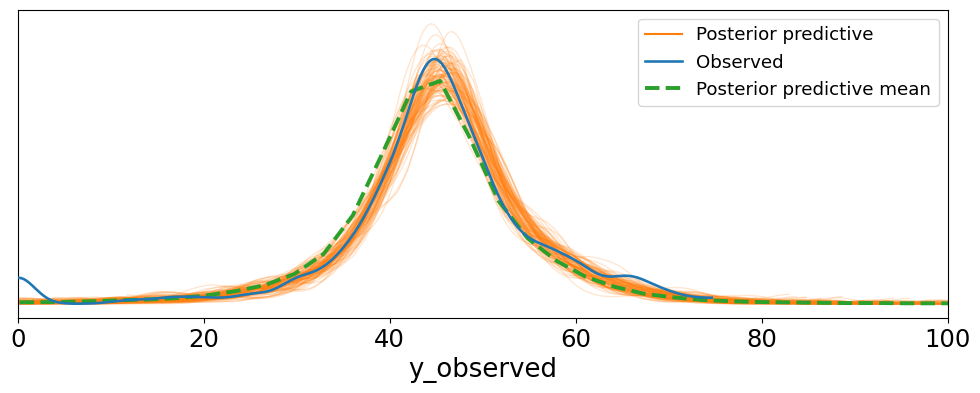

In [ ]:
pm.sample_posterior_predictive(iBG2_nh_skewstudentt, model=BG2_nh_skewstudentt, extend_inferencedata=True)

plot = az.plot_ppc(iBG2_nh_skewstudentt, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"])
plot.set_xlim(0, 100)

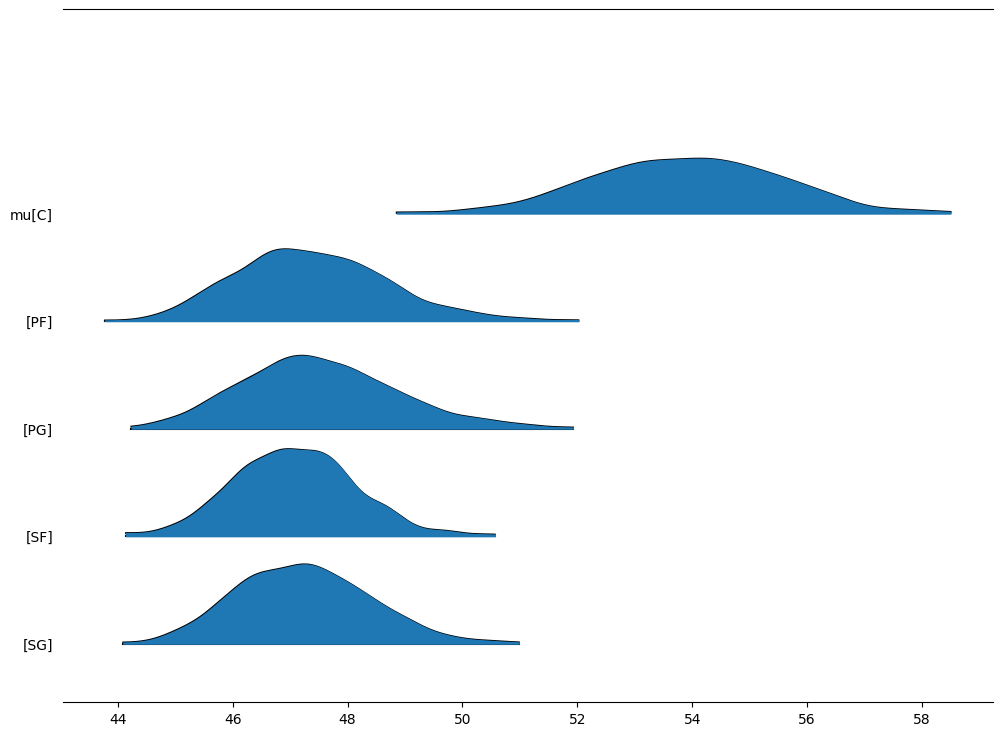

In [ ]:
axes = az.plot_forest(iBG2_nh_skewstudentt, kind="ridgeplot",
                      var_names='mu',
                      combined=True, figsize=(12, 9), hdi_prob=0.997)

This model is slightly better than the previous one. This one accounts for the skew and when looking at the individual modules, they looked alright.

I will say that this is my best hierarchical model for now as I have not gotten any better than this.

####**Final Non-hierarchical Model: Priors**

To specify the priors for the SkewStudentT model, I aimed to reflect the expected characteristics of the data while ensuring the model is flexible enough to capture the underlying distribution of the observed FG% values. For the location parameter (μ), I used a Normal prior centered at 50% with a standard deviation of 2, as this reflects a reasonable assumption that the mean FG% should be around 50%, with a relatively narrow spread based on prior knowledge of basketball shooting percentages. For the scale parameter (σ), I chose a HalfNormal prior with a standard deviation of 10, which ensures that the scale is positive and allows for variability in the FG% data. To capture the skewness in the distribution, I used two HalfNormal priors for the shape parameters a and b, both with a standard deviation of 2. These priors reflect the idea that the skewness could vary but must remain positive, which is consistent with the behavior of FG% data, where there may be a natural bias toward higher shooting percentages. These priors were chosen based on domain knowledge and to keep flexibility as I was not 100% on my guesses.

##**Part 4: Hierarchical Model**

Now that I have done the modeling of the non-hierarchical models to the best of my abilities, let's not use a hierarchical model which does assume dependence between the groups and has hyperpriors.

###**Model One**

In [6]:
with pm.Model(coords=pos_coords) as fg_percent_model_h:

    # Hyperpriors: Adjusting based on expectations for basketball data
    μ_mu = pm.Normal('μ_mu', mu=50, sigma=2)  # Hyperprior for mean (shooting percentage around 50%)
    σ_mu = pm.HalfNormal('σ_mu', sigma=2)     # Hyperprior for scale (shooting percentages have some spread)
    ν_mu = pm.Exponential('ν_mu', lam=.5)       # Hyperprior for degrees of freedom (set a moderate tail heaviness)

    # Regular priors: Based on basketball shooting percentage expectations
    mu = pm.StudentT('mu', mu=μ_mu, sigma=σ_mu, nu=ν_mu, dims="positions")  # Mean prior (shooting percentage ~ 50%)
    σ = pm.HalfNormal('σ', sigma=2, dims="positions")  # Scale prior (standard deviation of shooting percentage)
    ν = pm.Exponential('ν', lam=.5, dims="positions")  # Degrees of freedom for Student-T

    # Likelihood: Assuming the observed shooting data follows a StudentT distribution
    y = pm.StudentT('y', mu=mu[pos_index], sigma=σ[pos_index], nu=ν[pos_index],
                    observed=final_data["FG%"])  # FG% as observed data

    # Sampling: Perform sampling to generate posterior samples
    idata_fg_percent_h = pm.sample(draws=2000, tune=1000)


/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1278: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

Output()

Output()

(0.0, 100.0)

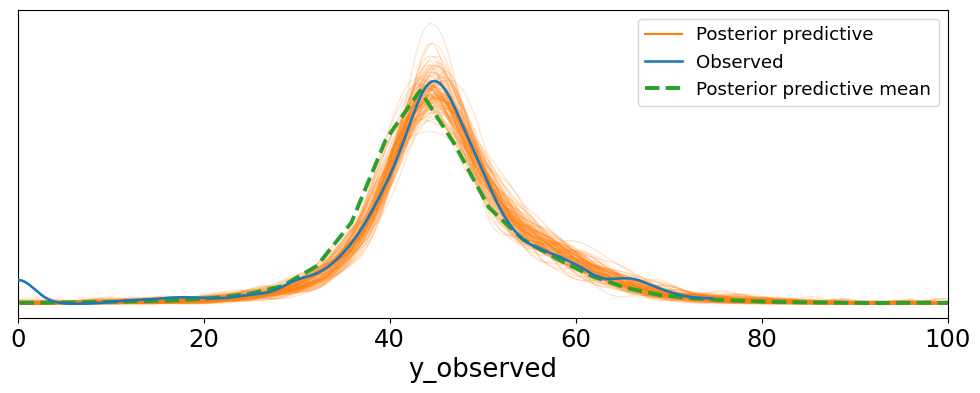

In [ ]:
pm.sample_posterior_predictive(idata_fg_percent_h, model=fg_percent_model_h, extend_inferencedata=True)

plot = az.plot_ppc(idata_fg_percent_h, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"])
plot.set_xlim(0, 100)

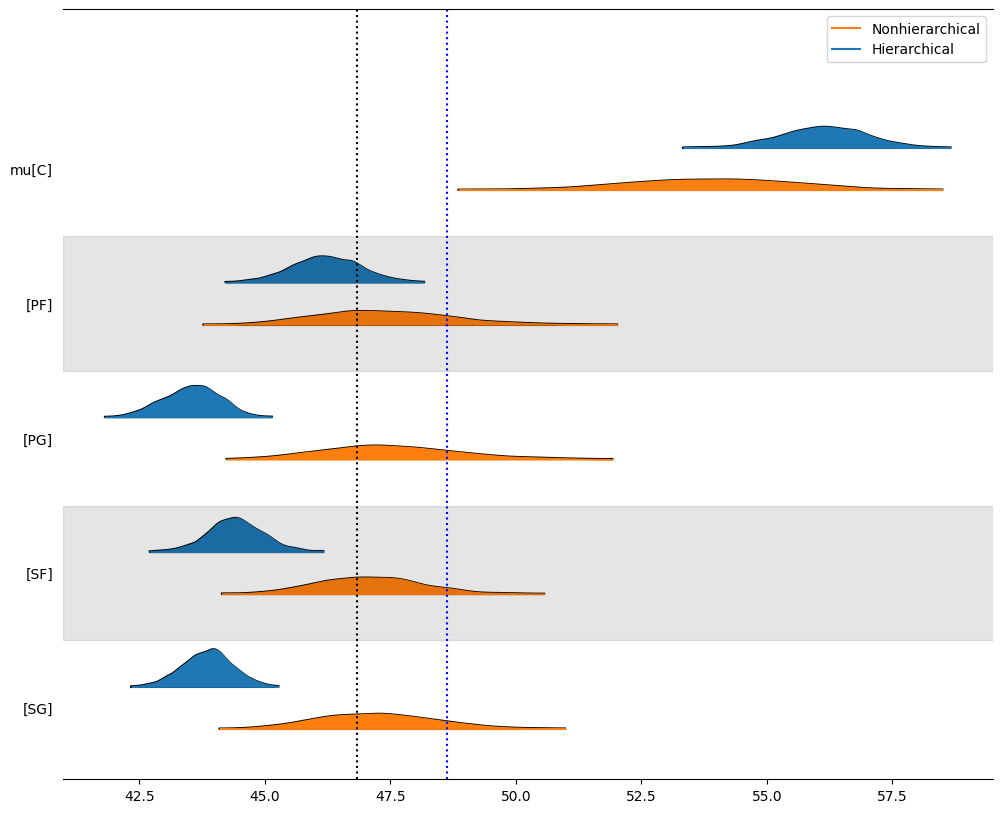

In [ ]:


axes = az.plot_forest([idata_fg_percent_h, iBG2_nh_skewstudentt], kind="ridgeplot",
                      model_names=['Hierarchical', 'Nonhierarchical'],
                      var_names='mu', combined=True, figsize=(12, 10),hdi_prob=0.997)

y_lims = axes[0].get_ylim()
axes[0].vlines(idata_fg_percent_h.posterior['mu'].mean(), *y_lims, color="k", ls=":");
axes[0].vlines(iBG2_nh_skewstudentt.posterior['mu'].mean(), *y_lims, color="b", ls=":");

In the graph above, you can see the idea of shrinkage where the means of the posteriors are drawn towards the means of our hyperpriors. This is present in hte hierarchical model while it isnt present in the non-hierarchical (like it should be).

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


<xarray.Dataset> Size: 9kB
Dimensions:             (positions: 5, y_dim_0: 559, y_unobserved_dim_0: 4)
Coordinates:
  * positions           (positions) <U2 40B 'C' 'PF' 'PG' 'SF' 'SG'
  * y_dim_0             (y_dim_0) int64 4kB 0 1 2 3 4 5 ... 554 555 556 557 558
  * y_unobserved_dim_0  (y_unobserved_dim_0) int64 32B 0 1 2 3
Data variables:
    mu                  (positions) float64 40B 1.001 1.001 1.001 1.0 1.001
    y                   (y_dim_0) float64 4kB nan nan nan nan ... nan nan nan
    y_unobserved        (y_unobserved_dim_0) float64 32B 1.003 1.001 1.005 1.007
    μ_mu                float64 8B 1.002
    ν                   (positions) float64 40B 1.004 1.001 1.002 1.001 1.0
    ν_mu                float64 8B 1.001
    σ                   (positions) float64 40B 1.003 1.003 1.002 1.002 0.9999
    σ_mu                float64 8B 1.003

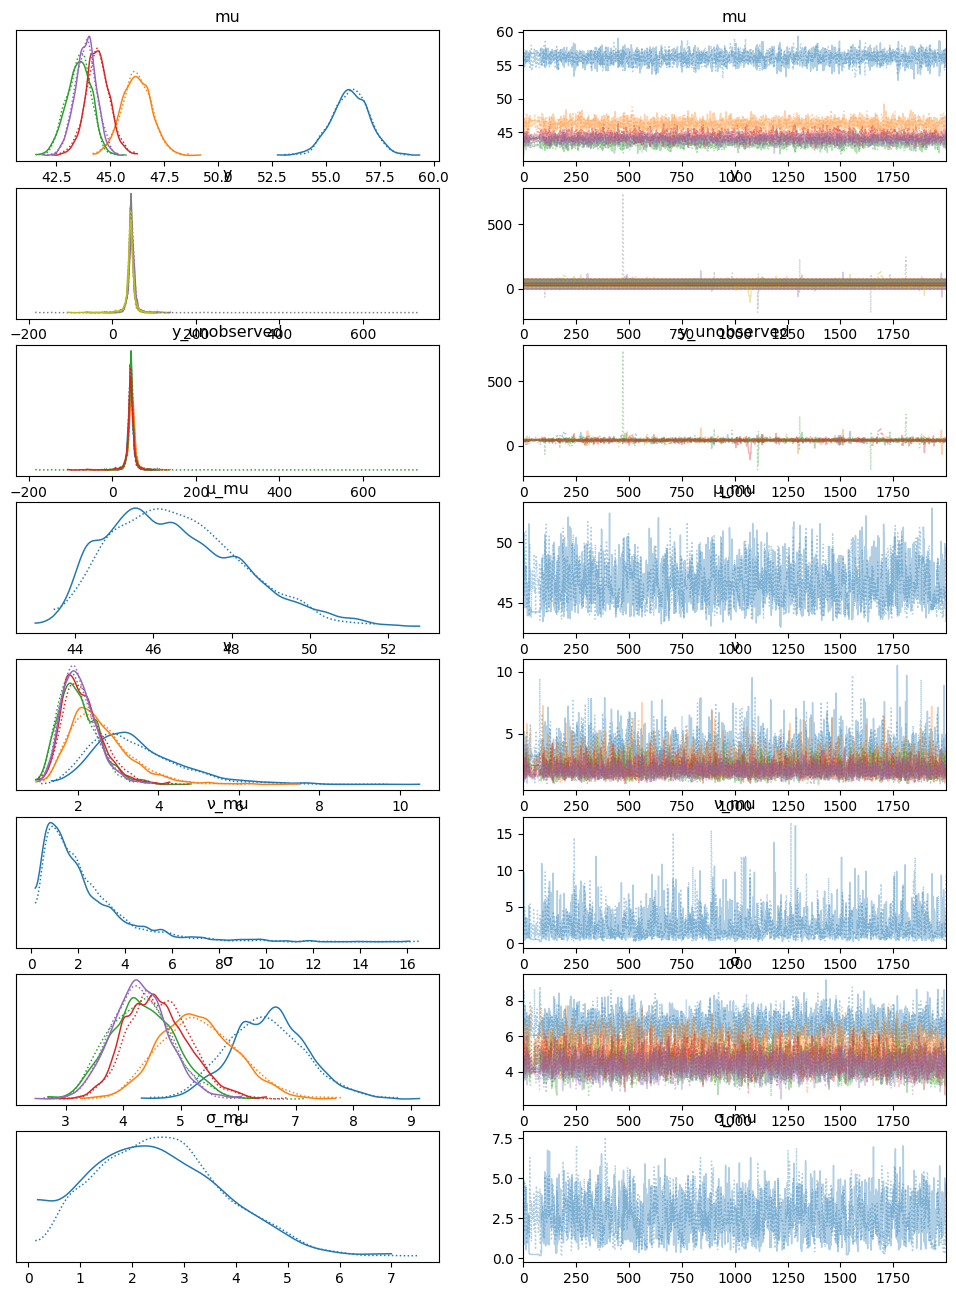

In [ ]:
az.plot_trace(idata_fg_percent_h)
az.rhat(idata_fg_percent_h)

While the model does look fine, we can still do better because we have yet to take into account the skew of our data.

The rhat values look fine as they are all around the 1.001 values and there are no values above 1.1. The trace also looks fine as most of the amplitudes match up.

###**Model Two**

For this next model, I will use SkewStudentT to accomodate for the skew present in our data.

In [7]:
with pm.Model(coords=pos_coords) as FG_h2:

    # Hyperpriors for the global parameters
    # These are the hyperpriors for the overall mean, scale, and shape (for skewness)
    μ_mu = pm.Normal('μ_mu', mu=50, sigma=2)  # Global mean (location)
    σ_mu = pm.HalfNormal('σ_mu', sigma=2)    # Global scale (how spread out the data is)
    a_mu = pm.HalfNormal('a_mu', sigma=2)     # Global skewness parameter (first shape parameter)
    b_mu = pm.HalfNormal('b_mu', sigma=2)     # Global skewness parameter (second shape parameter)

    # Priors for each group (positions or companies)
    mu = pm.Normal('mu', mu=μ_mu, sigma=σ_mu, dims="positions")  # Mean for each position (location)
    σ = pm.HalfNormal('σ', sigma=2, dims="positions")        # Scale for each position (spread)
    a = pm.HalfNormal('a', sigma=2, dims="positions")         # Skewness parameter for each position
    b = pm.HalfNormal('b', sigma=2, dims="positions")         # Skewness parameter for each position

    # SkewStudentT likelihood
    # The likelihood depends on the skewness parameters (a, b), location (μ), and scale (σ) for each group
    y = pm.SkewStudentT('y', mu=mu[pos_index], sigma=σ[pos_index], a=a[pos_index], b=b[pos_index],
                        observed=final_data["FG%"])

    # Sampling
    iFG_h2 = pm.sample()

# You can then analyze the trace or generate posterior predictive checks (PPC)


/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1278: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

Output()

Output()

(0.0, 100.0)

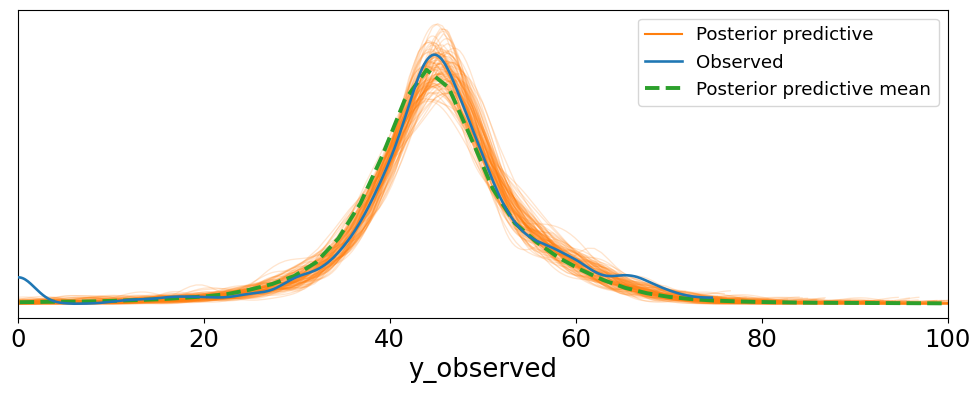

In [ ]:
pm.sample_posterior_predictive(iFG_h2, model=FG_h2, extend_inferencedata=True)

plot = az.plot_ppc(iFG_h2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C2"])
plot.set_xlim(0, 100)

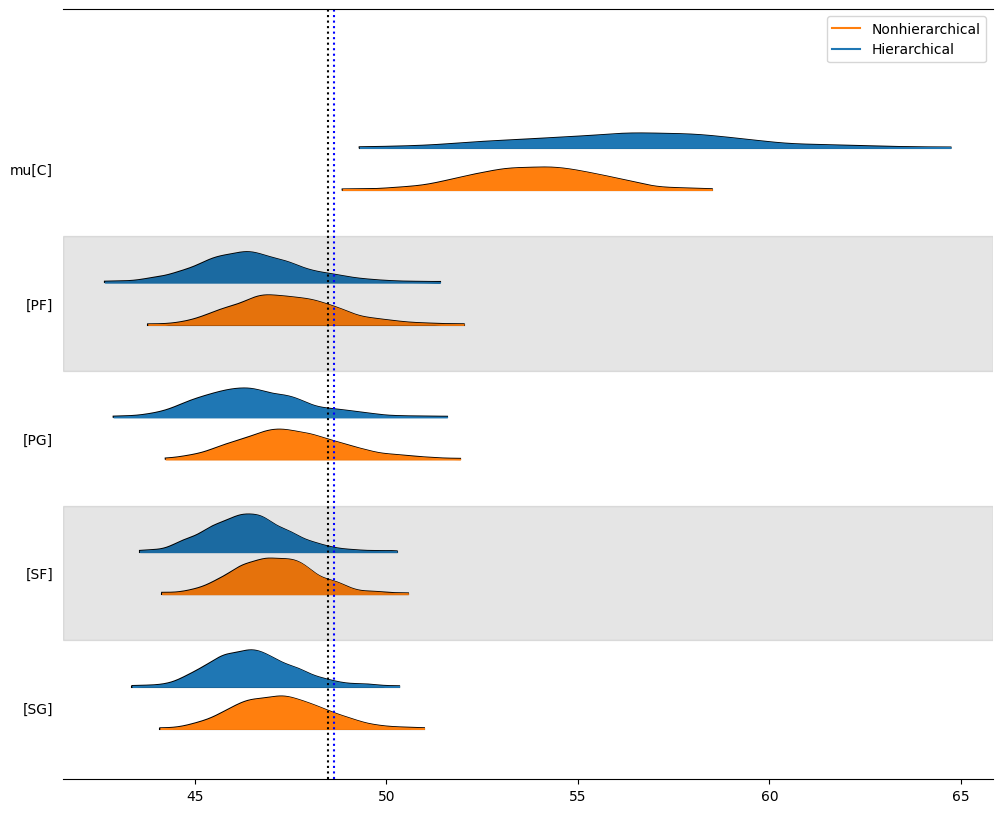

In [ ]:
axes = az.plot_forest([iFG_h2, iBG2_nh_skewstudentt], kind="ridgeplot",
                      model_names=['Hierarchical', 'Nonhierarchical'],
                      var_names='mu', combined=True, figsize=(12, 10),hdi_prob=0.997)

y_lims = axes[0].get_ylim()
axes[0].vlines(iFG_h2.posterior['mu'].mean(), *y_lims, color="k", ls=":");
axes[0].vlines(iBG2_nh_skewstudentt.posterior['mu'].mean(), *y_lims, color="b", ls=":");

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


<xarray.Dataset> Size: 9kB
Dimensions:             (positions: 5, y_dim_0: 559, y_unobserved_dim_0: 4)
Coordinates:
  * positions           (positions) <U2 40B 'C' 'PF' 'PG' 'SF' 'SG'
  * y_dim_0             (y_dim_0) int64 4kB 0 1 2 3 4 5 ... 554 555 556 557 558
  * y_unobserved_dim_0  (y_unobserved_dim_0) int64 32B 0 1 2 3
Data variables:
    a                   (positions) float64 40B 0.9991 1.001 0.9996 1.0 0.9994
    a_mu                float64 8B 1.0
    b                   (positions) float64 40B 1.001 1.001 0.9996 1.001 0.9994
    b_mu                float64 8B 1.001
    mu                  (positions) float64 40B 1.001 1.003 0.9998 1.004 1.0
    y                   (y_dim_0) float64 4kB nan nan nan nan ... nan nan nan
    y_unobserved        (y_unobserved_dim_0) float64 32B 1.001 1.013 1.006 1.002
    μ_mu                float64 8B 1.001
    σ                   (positions) float64 40B 0.9994 1.003 0.9992 0.9996 1.001
    σ_mu                float64 8B 1.001

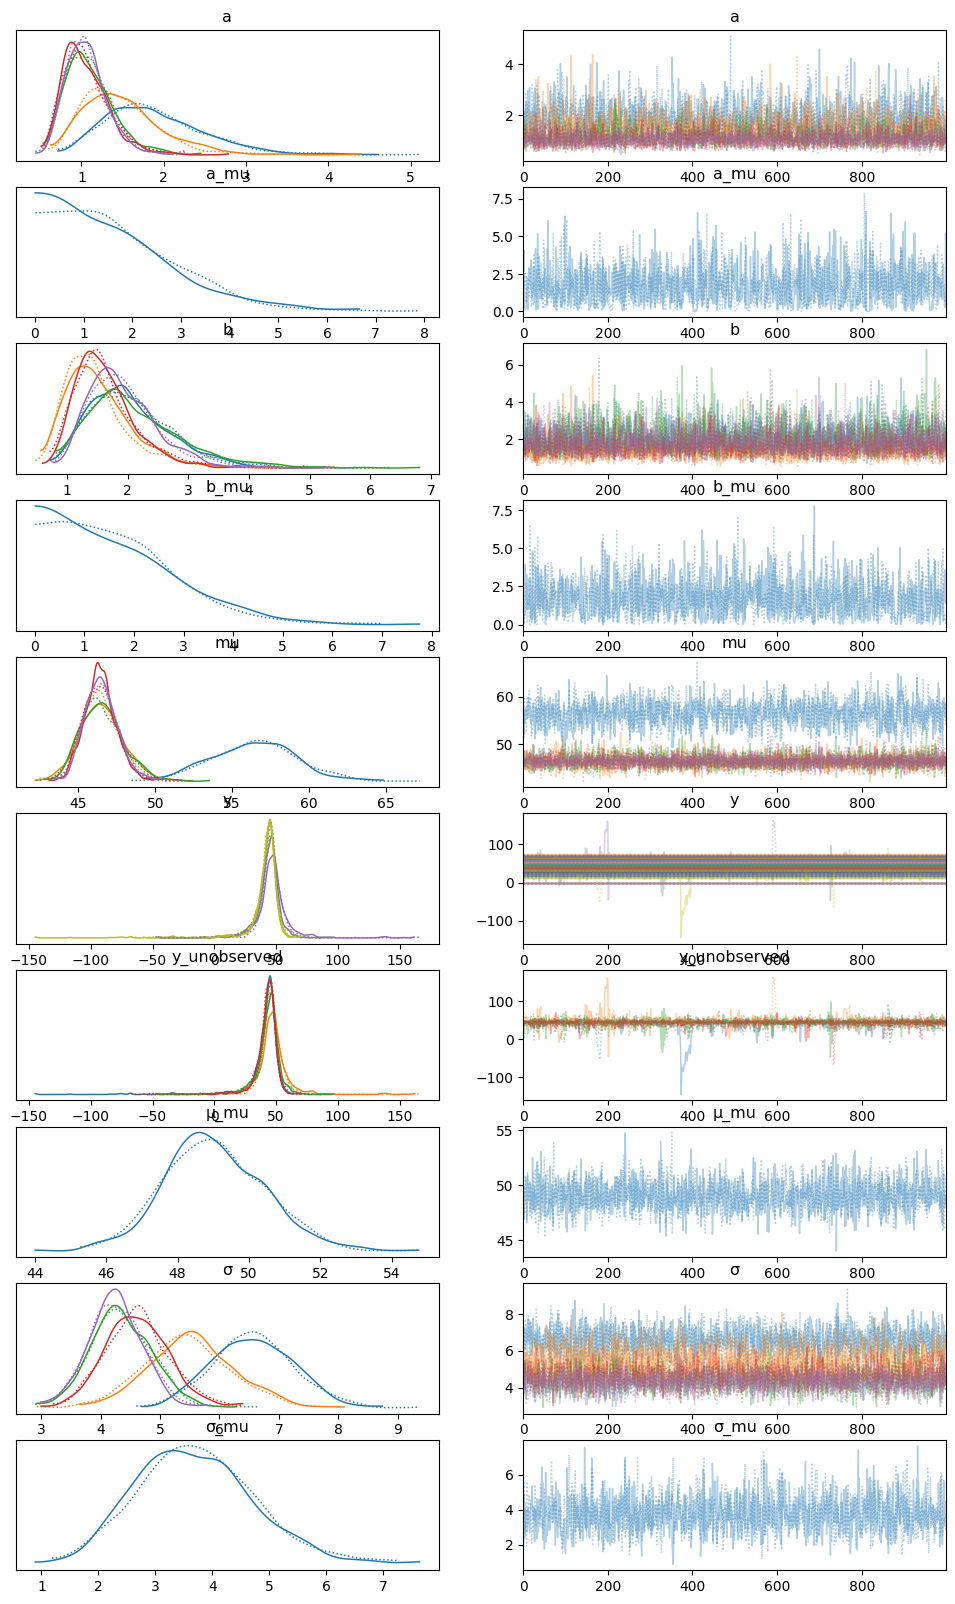

In [ ]:
az.plot_trace(iFG_h2)
az.rhat(iFG_h2)

Now that we have switched to using a model that accounts for skew, what has changed? First off, I think the ridgeplot may have become worse than the normal StudentT model. While there is still very slight shrinkage, it is not as noticable as the model before and the values are very, very similar to the non-hierarchical model almost as if there is no change (except for the center position). The rhat is still fine however they have became slightly worse than the StudentT model as now I am seeing rhat values slightly above 1.01. The trace is still fine even after the change to using SkewStudentT. The one thing is that the posterior predictive check for the second model looks better than the first.


What happened? Well I thought using this model would be better since this model accounts for the skew, but it turns out that the normal StudentT is better. Why? I'm not sure. Maybe the parameters I am using are bad or maybe something is up with the data, but i cant really pin it on something.

After seeing the changes, I believe that the best hierarchical model that I created was the very first model.

###**Just for Fun, Hierarchical vs Hierarchical**

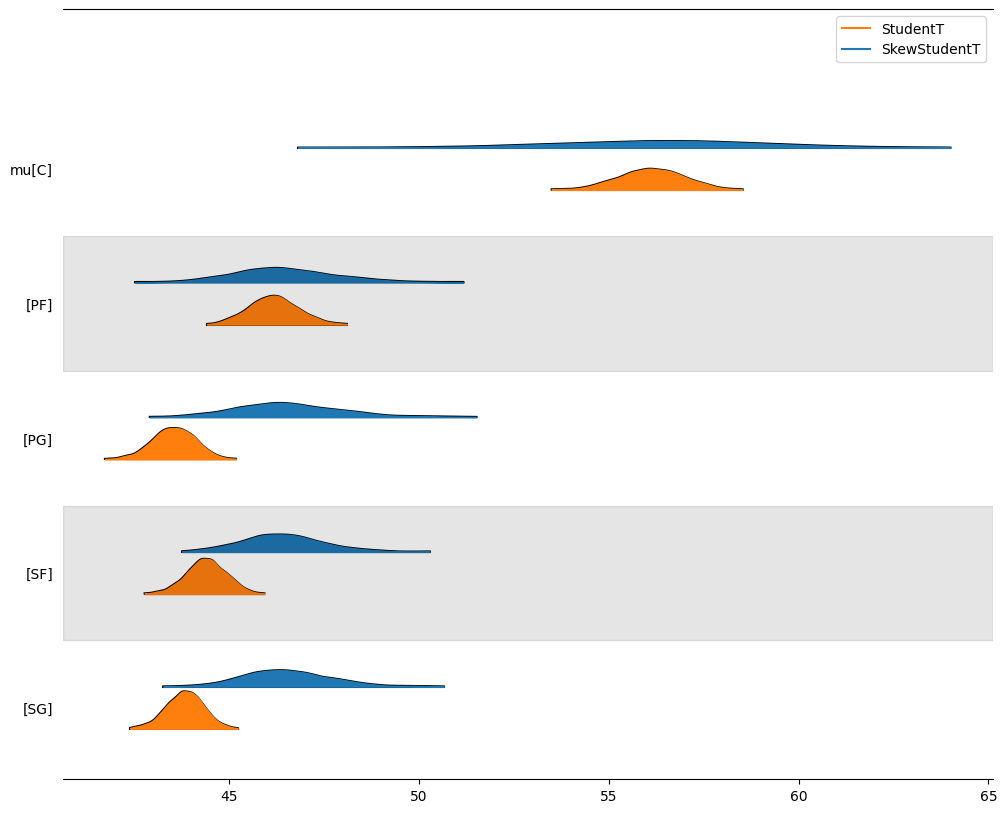

In [9]:
axes = az.plot_forest([iFG_h2, idata_fg_percent_h], kind="ridgeplot",
                      model_names=['SkewStudentT', 'StudentT'],
                      var_names='mu', combined=True, figsize=(12, 10),hdi_prob=0.997)

y_lims = axes[0].get_ylim()

##**Part 5: Conclusion**

Firstly, when looking at the means of our two models, we see that the mean for the non-hierarchical model is around 48.5% while the mean for the hierarchical model is 47%. This means that based on all the positions, the entire average of the league is between 47-48.5% which is something I find to be believable, but slightly optimistic. Considering how the game has changed and more 3s are being shot every year, i feel like the percentage would be around 45%.

Now what about each position individually.

Well, lets first look at the center position. Compared to the rest of the positions, this has **by far** the highest FG percentage with its mean being around 54%. From personal experience from watching the NBA and looking at player stats, this is actually pretty reflective of what their field goal percentage should be. Usually the centers are the big guys so they dont shoot many threes and get down low in the paint and get in usually easy buckets leading to their high fg percentage. However, because of how the game and position has evolved, the fg percentage is lower than what it woudlve been because there has been more bigs shooting 3s as of late.

Getting the outlier out of the way, lets look at the rest of the positions: Point Guard, Shooting Guard, Small Forward, and Power Forward. I'd say that the model shows that these 4 positions are closely related to each other because in the non-hierarchical model, we see that the values for these 4 positions are pretty similar. I'd say that this predicition from the model is pretty accurate because considering how the game has evolved, a lot of players from these 4 positions take very, very similar shots (especially increased 3s) which leads them to have similar FG percentages.

To wrap it up, I would say that while the models may have not been the best, they have been able to decently model what has happened in the 23-24 season with each position and their FG percentage.